In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\everything\eda + dap\dap\10Mall_Customers.csv')

In [4]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [10]:
features = ['Gender', 'Age', 'Spending Score (1-100)']
X = df[features]
y = df['Annual Income (k$)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test)


In [19]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 472.77934557893593
Mean Absolute Error: 18.16428778164776
R^2 Score: -0.05370138101852984


In [26]:
# Define the input values for age and spending
age = 30  # Example age
spending = 50  # Example spending score

# Create a DataFrame for the input values
input_data = pd.DataFrame({'Gender': [1], 'Age': [age], 'Spending Score (1-100)': [spending]})

# Predict the annual income using the trained model
predicted_income = model.predict(input_data)
print(f'Predicted Annual Income: {predicted_income[0]}')

Predicted Annual Income: 62.82485829380198


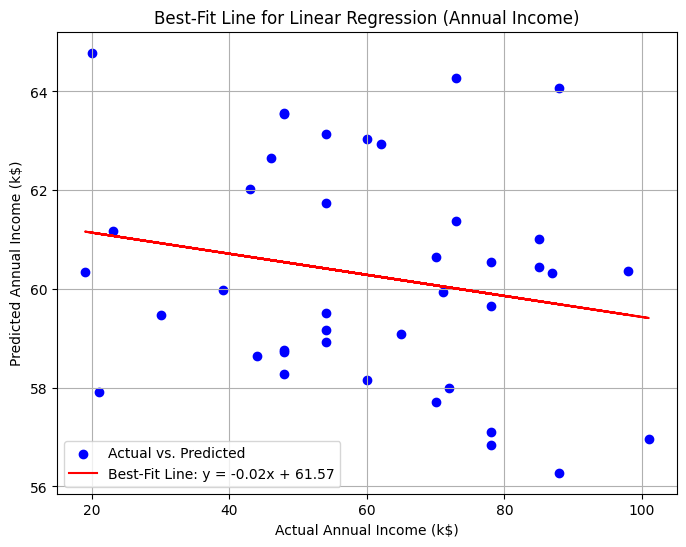

Best-fit line equation: y = -0.02x + 61.57


In [31]:
import numpy as np# Calculate best-fit line for actual vs. predicted values
coefficients = np.polyfit(y_test, y_pred, 1)
m, b = coefficients  # Slope and intercept
line = m * y_test + b

# Plot scatter of actual vs. predicted with best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, line, color='red', label=f'Best-Fit Line: y = {m:.2f}x + {b:.2f}')
plt.title('Best-Fit Line for Linear Regression (Annual Income)')
plt.xlabel('Actual Annual Income (k$)')
plt.ylabel('Predicted Annual Income (k$)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best-fit line equation: y = {m:.2f}x + {b:.2f}")
